Code based on example provided in:
https://www.datacamp.com/tutorial/decision-tree-classification-python

In [ ]:
!pip install skl2onnx

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn import tree
from skl2onnx import to_onnx

from google.colab import drive

drive.mount('/content/drive/')
path = 'replace with path to folder with data files/' #Defining the path

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
col_names = ['CH1','LABEL']
csvData = pd.read_csv(path+"manualFeed.csv", header=None, names=col_names)

In [ ]:
sensors = ['CH1']  # The channel containing sensor data, i.e. the independent variables
X = csvData[sensors] # The independent variables (i.e. the EMG signals) from each channel that reflect either rest or muscle activation
Y = csvData.LABEL # The dependent variable, which states whether the corresponding data is 'positive' or 'negative'

In [ ]:
# Splits up the data into training and testing groups
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2) # 80% training and 20% test

clf = DecisionTreeClassifier(max_depth = 5) # Creates the decision tree classifier


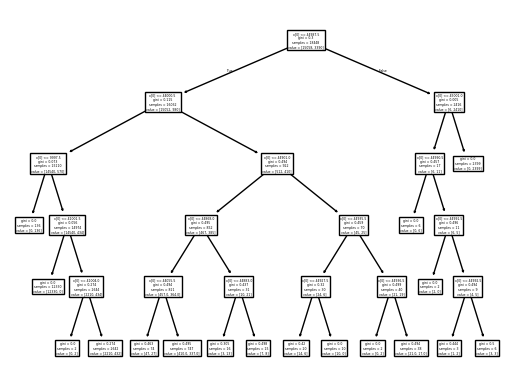

In [ ]:
clf = clf.fit(X_train,Y_train)  # Trains the classifier on the training dataset
tree.plot_tree(clf) # Plots the tree for visual inspection

# This block of code saves the model to an ONNX file in the same drive folder as the data files.
# Code based on documentation example:  https://onnx.ai/sklearn-onnx/index.html
onx = to_onnx(clf, X[:1])
with open(path+"dtree.onnx", "wb") as f:
    f.write(onx.SerializeToString())


Accuracy: 0.9486234554519836


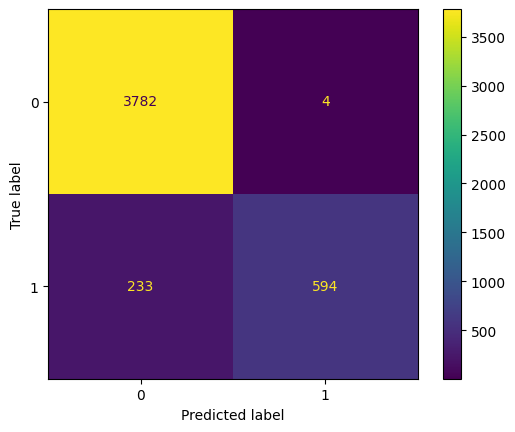

In [ ]:
Y_pred = clf.predict(X_test)  # Test the data against the test dataset

#target_names = ['negative', 'positive']
#print(classification_report(X_test, Y_pred, target_names=target_names))

cf = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)  # Creates a confusion matrix object using the test results
conf_display = ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = clf.classes_) # Loads the confusion matrix into a display

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred)) # Displays the accuracy of the model as a %.

conf_display.plot() # Plots the confusion matrix
